# Project : Census Income

In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census

# Problem Statement:
    
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms

# Tasks To Be Performed:
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.

In [1]:
## Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the Data
df = pd.read_csv("census-income .csv")
print('Dimension of dataset:',df.shape)
df.head()

Dimension of dataset: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

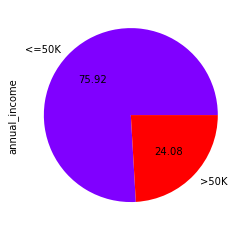

In [5]:
df['annual_income'].value_counts().plot(kind='pie',autopct='%.2f',cmap='rainbow');

Insight--> More than 75% individual makes equal and below 50,000 a year

<AxesSubplot:xlabel='workclass', ylabel='count'>

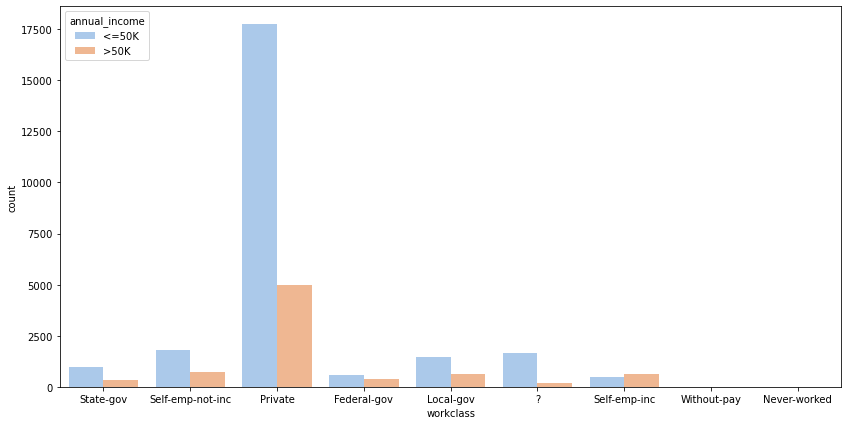

In [6]:
plt.figure(figsize=(14,7))
sns.countplot(x='workclass',data=df,hue='annual_income',palette='pastel')

Insight--> Private workclass people makes equal and over 50,000 a year 

# EDA of Categorical and Numerical columns

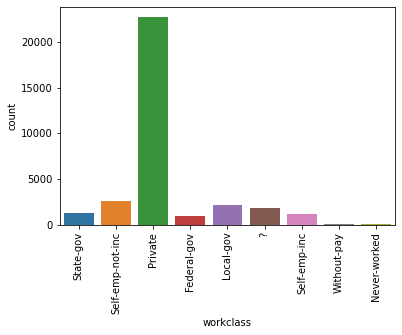

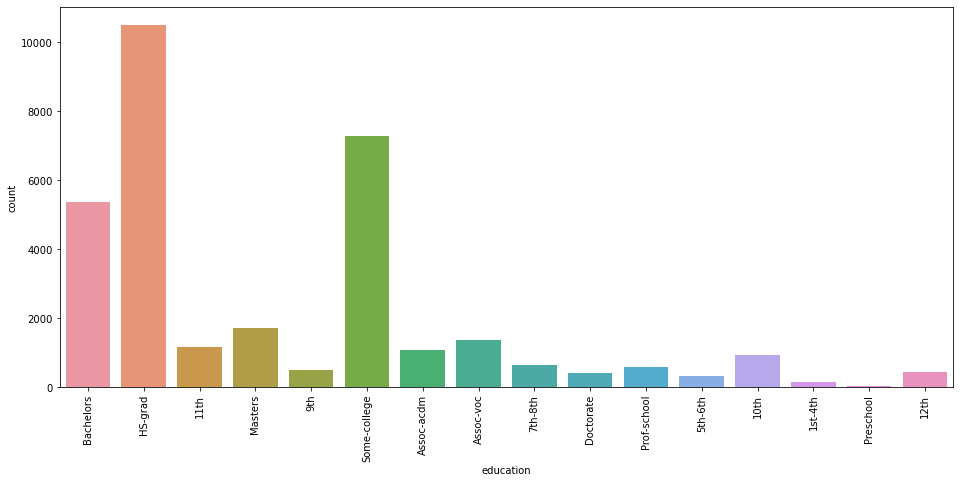

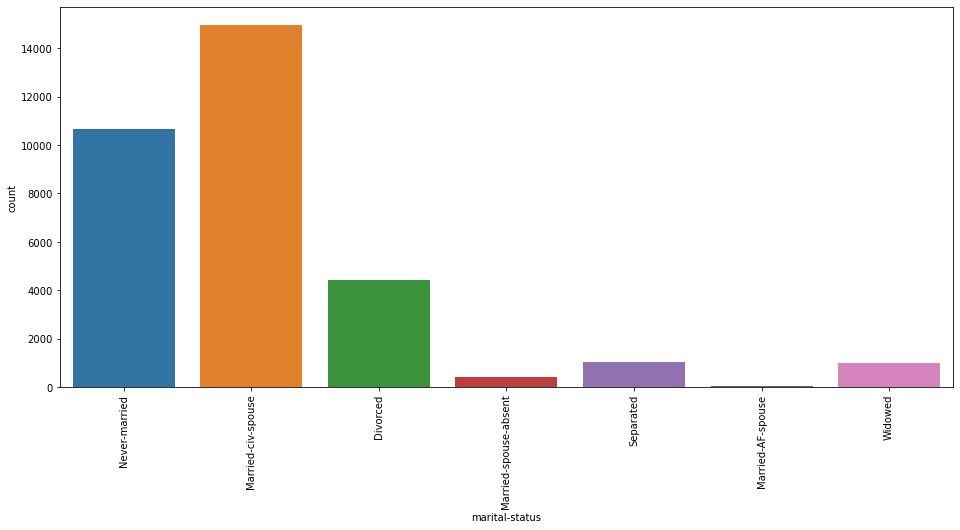

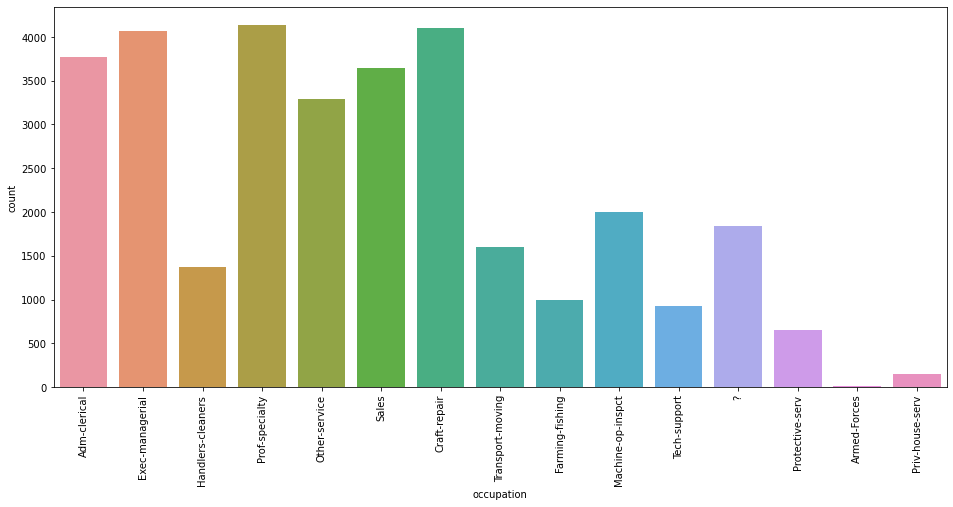

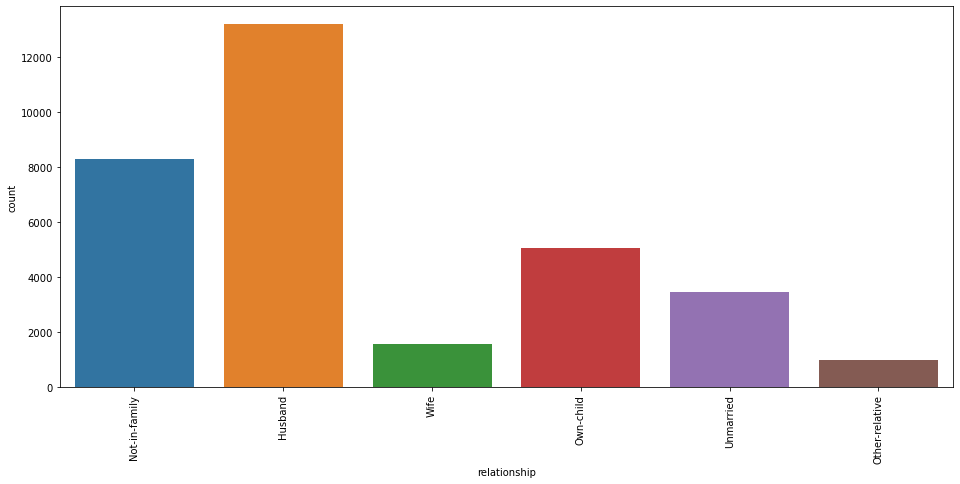

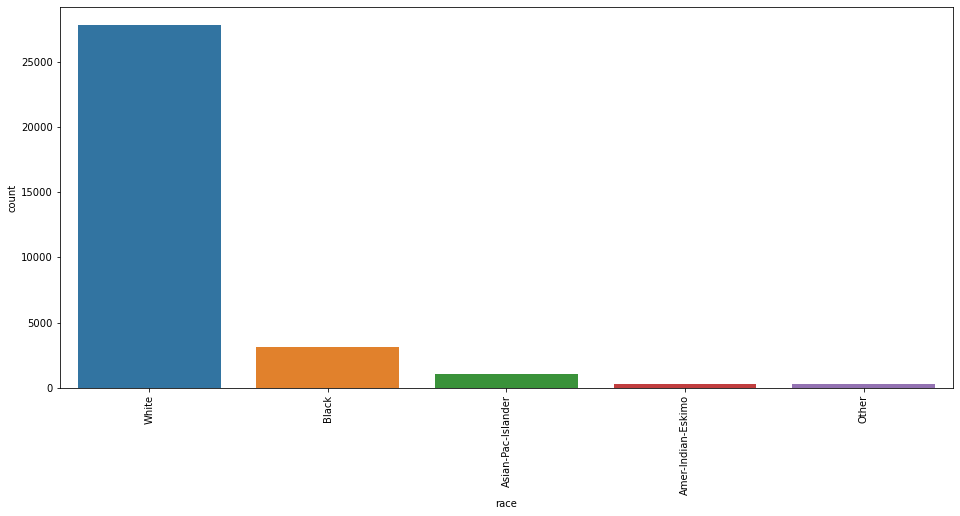

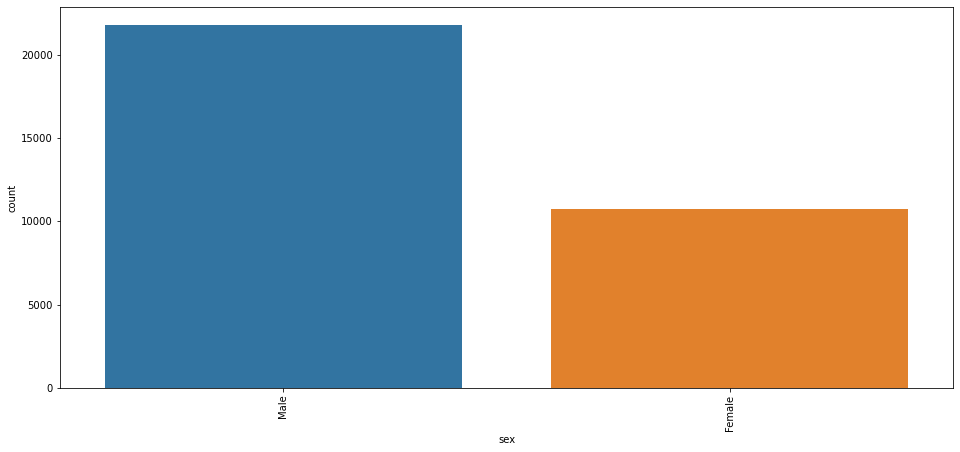

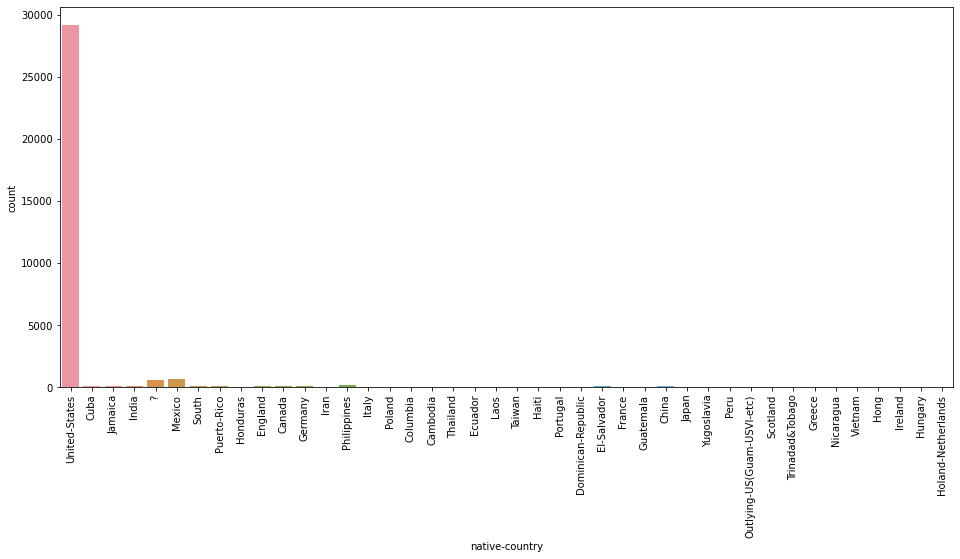

<Figure size 1152x504 with 0 Axes>

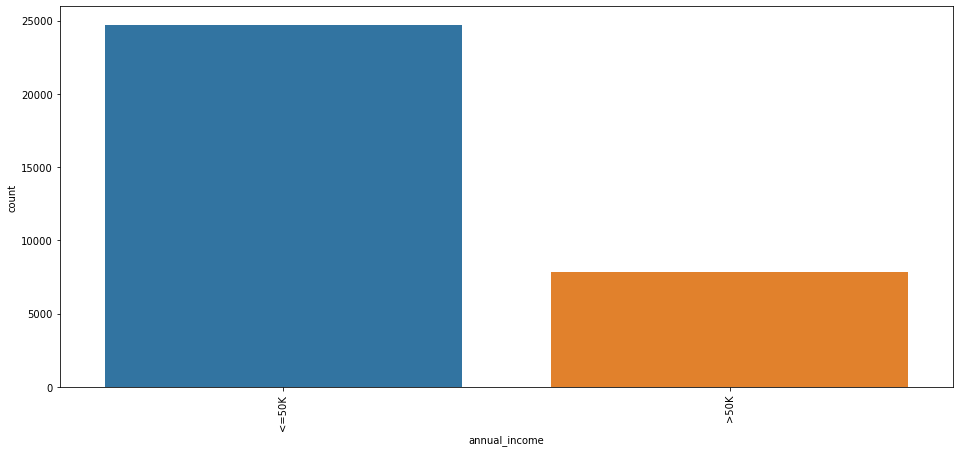

In [7]:
cat=[i for i in df.columns if df[i].dtypes=='object']

for i,features in enumerate(cat):
    plt.figure(figsize=(16,7))
    plt.figure(i)
    sns.countplot(df[features])
    plt.xticks(rotation=90)

plt.show()

Insight--> while having a close look at our dataset, we observe some of the values as ‘?’, which represent missing values.Hence, we deduce that there are some values in our data set which need to be treated.

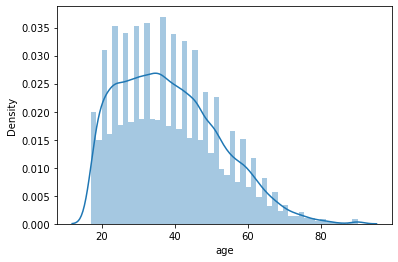

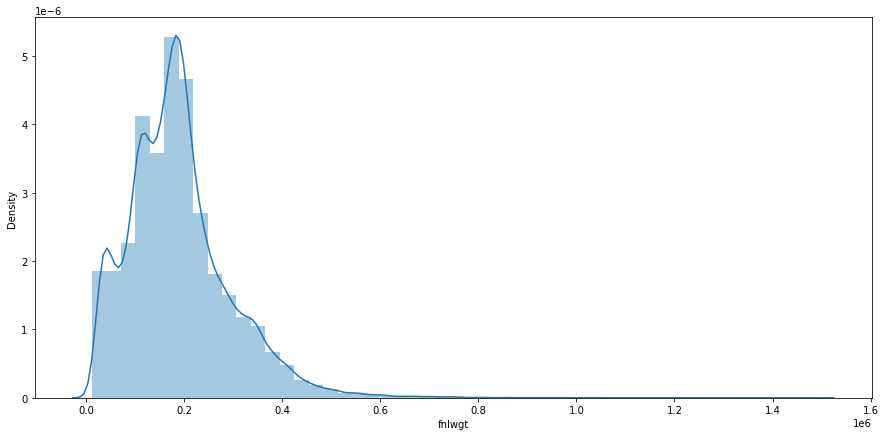

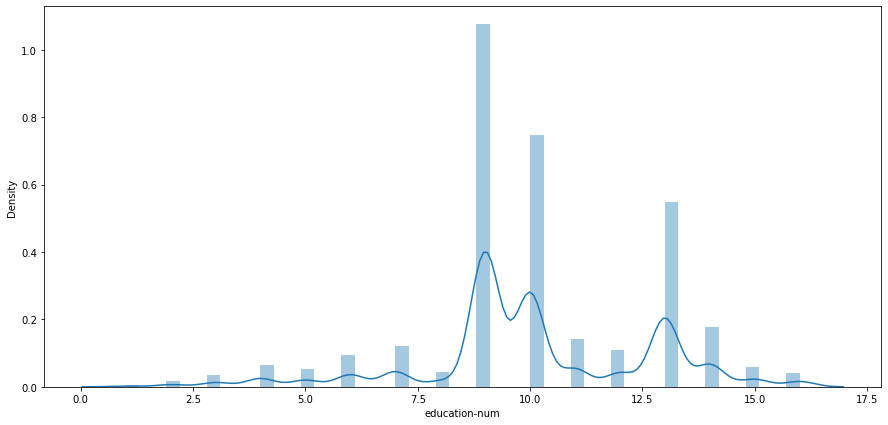

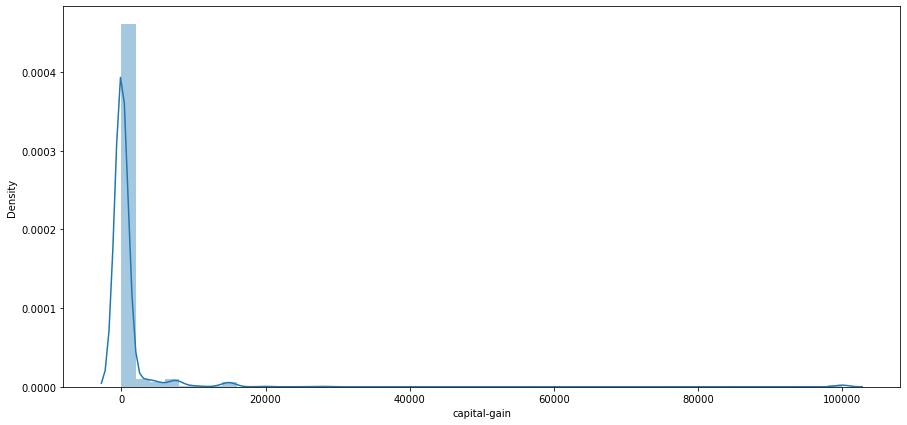

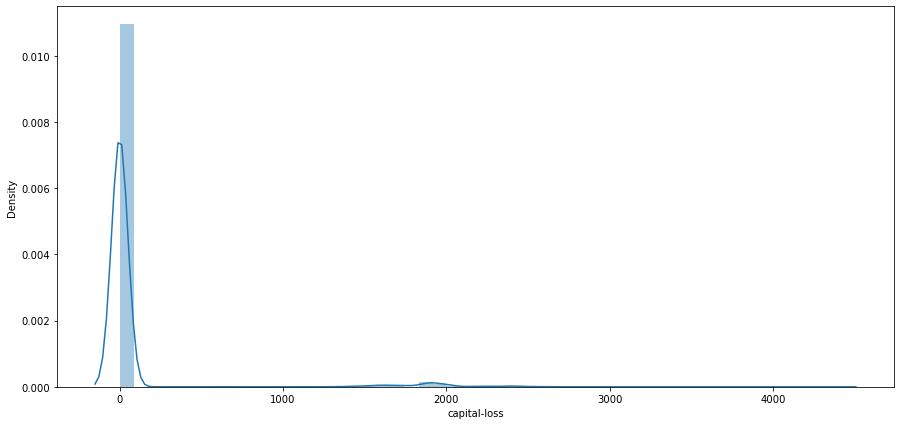

<Figure size 1080x504 with 0 Axes>

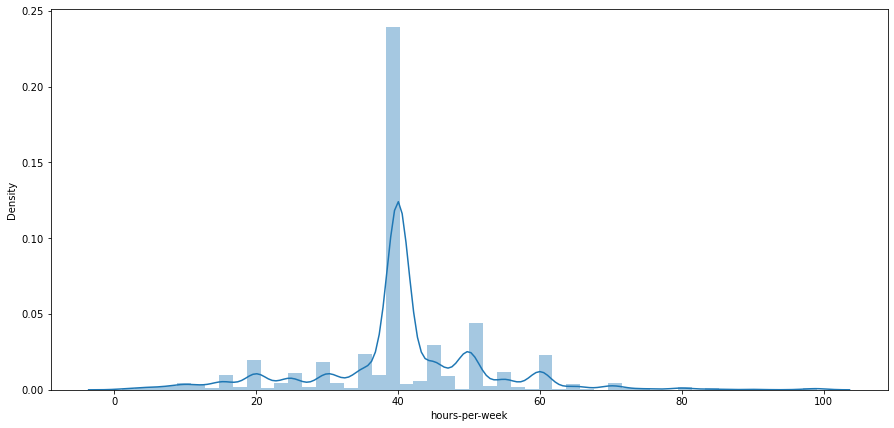

In [8]:
num = [i for i in df.columns if df[i].dtypes!='object']

for i,columns in enumerate(num):
    plt.figure(figsize=(15,7))
    plt.figure(i)
    sns.distplot(df[columns])

# Handling Missing Values

In [11]:
#Removing missing values

print("Shape before removing null values ",(df.shape))

df = df[df['workclass']!= '?']
df = df[df['occupation']!= '?']
df = df[df['native-country']!= '?']

print('Shape after removing null values ',(df.shape))

Shape before removing null values  (30162, 15)
Shape after removing null values  (30162, 15)


In [12]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
ss = StandardScaler()

In [14]:
df1 = df.copy()
df1 = df1.apply(le.fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


In [15]:
df1.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
annual_income     int32
dtype: object

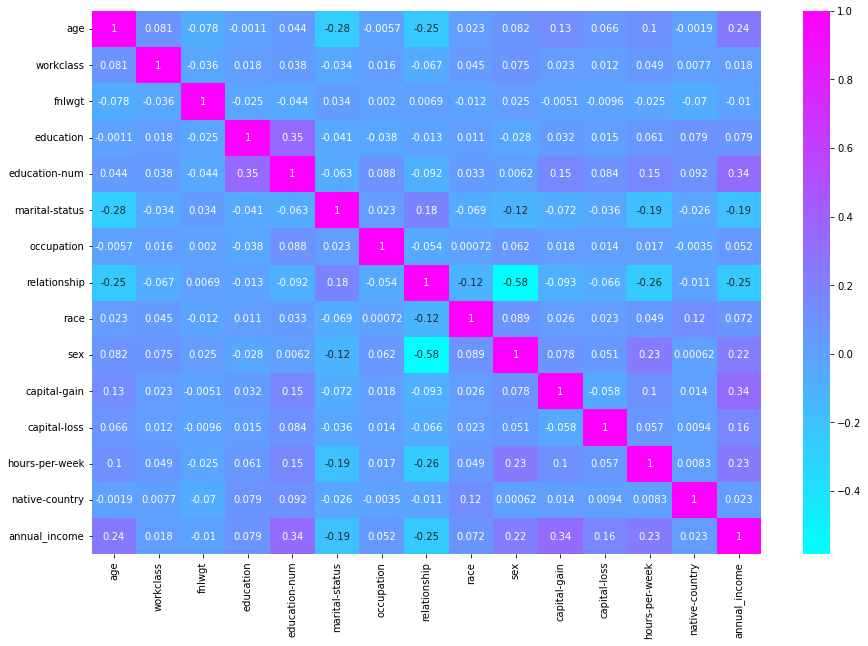

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='cool');

# Random Forest,Decision Tree,Bagging,Logistic Regression Classifier Models 

In [18]:
x = df1.iloc[:,:-1]
y = df1['annual_income']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.3,random_state= 42)

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [20]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bc = BaggingClassifier(base_estimator=rf,n_estimators=100)

In [22]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [23]:
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

In [24]:
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

In [25]:
bc.fit(x_train,y_train)
y_pred3 = bc.predict(x_test)

In [26]:
print('Accuracy of LogisticRegression Model is :',accuracy_score(y_test,y_pred)*100)
print('Accuracy of DecisionTreeClassifier Model is :',accuracy_score(y_test,y_pred1)*100)
print('Accuracy of RandomForestClassifier Model is :',accuracy_score(y_test,y_pred2)*100)
print('Accuracy of BaggingClassifier Model is :',accuracy_score(y_test,y_pred3)*100)

Accuracy of LogisticRegression Model is : 81.69963531881976
Accuracy of DecisionTreeClassifier Model is : 80.31826721184662
Accuracy of RandomForestClassifier Model is : 85.55641507348878
Accuracy of BaggingClassifier Model is : 85.86584152945078


# Hyper Parameter Tunning

In [27]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dt, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [28]:
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(x_test)
print('Accuracy of DecisionTreeModel After Hyperparameter Tuning :',accuracy_score(y_test, Y_pred))

Accuracy of DecisionTreeModel After Hyperparameter Tuning : 0.8505912255497845


In [29]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8478186776459202


# Performance Evaluation

When making predictions on events we can get 4 types of results: True Positives, True Negatives, False Positives, and False Negatives. The objective of the project is to correctly identify what individuals make more than 50k$ per year, Therefore we should choose wisely our evaluation metric.

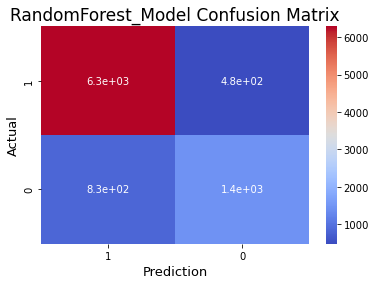

In [40]:
cm = confusion_matrix(y_test,y_pred2)

#Plot the confusion matrix.
sns.heatmap(cm,annot=True,xticklabels=['1','0'],yticklabels=['1','0'],cmap='coolwarm')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('RandomForest_Model Confusion Matrix',fontsize=17)
plt.show()

In [41]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6767
           1       0.75      0.64      0.69      2282

    accuracy                           0.86      9049
   macro avg       0.82      0.78      0.80      9049
weighted avg       0.85      0.86      0.85      9049



In [43]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6767
           1       0.77      0.63      0.69      2282

    accuracy                           0.86      9049
   macro avg       0.82      0.78      0.80      9049
weighted avg       0.85      0.86      0.85      9049



# Observations
The optimized model’s accuracy and F-score on testing data on baggingClassifier model is  85.86% and 91% respectively,which is slightly higher than RandomForest classifier. These scores are slightly better than the ones of the unoptimized model but the computing time is far larger.

# Conclusion
Throughout in this project, we made a machine learning classification analysis from end-to-end and we learned and obtained several insights about classification models and the keys to develop one with a good performance.

THANK YOU